# Análisis Exploratorio de Datos - RSAM Volcán Láscar 2023 LC01


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
from scipy import signal
from pathlib import Path
import json
import warnings
warnings.filterwarnings('ignore')


plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 11


PROJECT_ROOT = Path.cwd().parent
PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"
FIGURES_DIR = PROJECT_ROOT / "figures"
FIGURES_DIR.mkdir(exist_ok=True)

print("Librerías cargadas correctamente")

Librerías cargadas correctamente


---
## 1. Descripción del Dataset

### 1.1 Origen y Contexto de Adquisición

In [ ]:

df_rsam = pd.read_csv(PROCESSED_DIR / 'rsam_series.csv')
df_rsam['datetime'] = pd.to_datetime(df_rsam['datetime'])
df_rsam = df_rsam.sort_values('datetime').reset_index(drop=True)


with open(PROCESSED_DIR / 'rsam_metadata.json') as f:
    metadata = json.load(f)


RSAM_MEAN = metadata['rsam_mean']
RSAM_STD = metadata['rsam_std']
RSAM_PER_HOUR = metadata['rsam_per_hour']

In [ ]:

print("\nPrimeros registros:")
print(df_rsam.head(10).to_string())

print("\n\nÚltimos registros:")
print(df_rsam.tail(10).to_string())

print("\n\nTipos de datos:")
print(df_rsam.dtypes)


Primeros registros:
             datetime       rsam  rsam_norm
0 2023-01-01 00:00:00  84435.590   1.027633
1 2023-01-01 00:10:00  83086.730   0.959209
2 2023-01-01 00:20:00  81669.510   0.887317
3 2023-01-01 00:30:00  80234.380   0.814517
4 2023-01-01 00:40:00  78771.000   0.740284
5 2023-01-01 00:50:00  77281.260   0.664713
6 2023-01-01 01:00:00  75775.195   0.588315
7 2023-01-01 01:10:00  74274.600   0.512194
8 2023-01-01 01:20:00  72777.400   0.436245
9 2023-01-01 01:30:00  71280.960   0.360335


Últimos registros:
                 datetime       rsam  rsam_norm
52550 2023-12-31 22:20:00  98338.190   1.732873
52551 2023-12-31 22:30:00  98034.125   1.717449
52552 2023-12-31 22:40:00  97654.800   1.698206
52553 2023-12-31 22:50:00  97147.600   1.672478
52554 2023-12-31 23:00:00  96505.234   1.639892
52555 2023-12-31 23:10:00  95768.710   1.602530
52556 2023-12-31 23:20:00  94940.360   1.560510
52557 2023-12-31 23:30:00  94020.760   1.513862
52558 2023-12-31 23:40:00  93018.770   1.4

---
## 2. Estadísticas Descriptivas

In [ ]:

rsam_values = df_rsam['rsam'].values

print("="*70)
print("ESTADÍSTICAS DESCRIPTIVAS - RSAM")
print("="*70)


print("\n📊 MEDIDAS DE TENDENCIA CENTRAL:")
print(f"   Media:              {np.mean(rsam_values):,.2f}")
print(f"   Mediana:            {np.median(rsam_values):,.2f}")
print(f"   Moda (aprox):       {stats.mode(rsam_values.astype(int), keepdims=True)[0][0]:,.0f}")


print("\n📏 MEDIDAS DE DISPERSIÓN:")
print(f"   Desv. Estándar:     {np.std(rsam_values):,.2f}")
print(f"   Varianza:           {np.var(rsam_values):,.2f}")
print(f"   Coef. Variación:    {np.std(rsam_values)/np.mean(rsam_values)*100:.1f}%")
print(f"   Rango:              {np.ptp(rsam_values):,.2f}")
print(f"   IQR:                {np.percentile(rsam_values, 75) - np.percentile(rsam_values, 25):,.2f}")


print("\n📍 PERCENTILES:")
for p in [1, 5, 10, 25, 50, 75, 90, 95, 99]:
    print(f"   P{p:02d}:                {np.percentile(rsam_values, p):,.2f}")


print("\n📐 MEDIDAS DE FORMA:")
skewness = stats.skew(rsam_values)
kurtosis = stats.kurtosis(rsam_values)
print(f"   Asimetría:          {skewness:.4f} {'(→ cola derecha)' if skewness > 0 else '(→ cola izquierda)'}")
print(f"   Curtosis:           {kurtosis:.4f} {'(leptocúrtica)' if kurtosis > 0 else '(platicúrtica)'}")


print("\n⚠️ VALORES EXTREMOS:")
print(f"   Mínimo:             {np.min(rsam_values):,.2f}")
print(f"   Máximo:             {np.max(rsam_values):,.2f}")
print(f"   Ratio Max/Media:    {np.max(rsam_values)/np.mean(rsam_values):.1f}x")

ESTADÍSTICAS DESCRIPTIVAS - RSAM

📊 MEDIDAS DE TENDENCIA CENTRAL:
   Media:              64,177.58
   Mediana:            58,342.89
   Moda (aprox):       45,659

📏 MEDIDAS DE DISPERSIÓN:
   Desv. Estándar:     19,713.09
   Varianza:           388,606,081.14
   Coef. Variación:    30.7%
   Rango:              429,772.70
   IQR:                33,467.16

📍 PERCENTILES:
   P01:                36,635.08
   P05:                40,324.78
   P10:                42,984.79
   P25:                47,288.42
   P50:                58,342.89
   P75:                80,755.58
   P90:                93,832.34
   P95:                98,925.43
   P99:                107,407.68

📐 MEDIDAS DE FORMA:
   Asimetría:          0.6645 (→ cola derecha)
   Curtosis:           1.3080 (leptocúrtica)

⚠️ VALORES EXTREMOS:
   Mínimo:             0.00
   Máximo:             429,772.70
   Ratio Max/Media:    6.7x


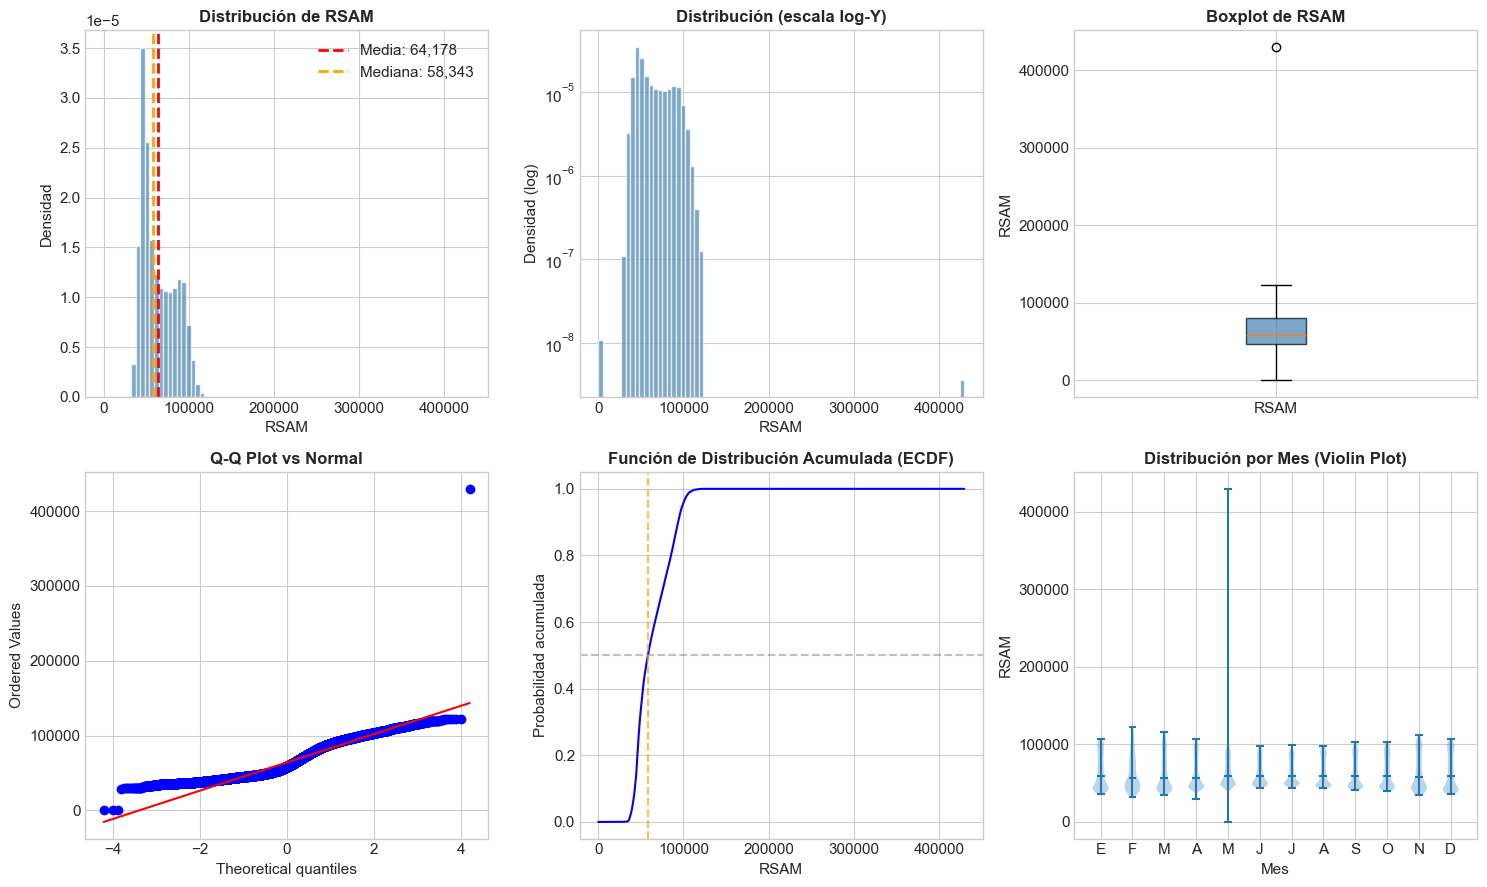


📝 Interpretación:
   - Distribución asimétrica positiva (skew=0.66)
   - Colas pesadas (curtosis=1.31) → eventos de alta amplitud ocasionales
   - Se desvía de normalidad → considerar transformación log para algunos análisis


In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(15, 9))


ax = axes[0, 0]
ax.hist(rsam_values, bins=80, density=True, alpha=0.7, color='steelblue', edgecolor='white')
ax.axvline(np.mean(rsam_values), color='red', linestyle='--', linewidth=2, label=f'Media: {np.mean(rsam_values):,.0f}')
ax.axvline(np.median(rsam_values), color='orange', linestyle='--', linewidth=2, label=f'Mediana: {np.median(rsam_values):,.0f}')
ax.set_title('Distribución de RSAM', fontweight='bold')
ax.set_xlabel('RSAM')
ax.set_ylabel('Densidad')
ax.legend()


ax = axes[0, 1]
ax.hist(rsam_values, bins=80, density=True, alpha=0.7, color='steelblue', edgecolor='white')
ax.set_yscale('log')
ax.set_title('Distribución (escala log-Y)', fontweight='bold')
ax.set_xlabel('RSAM')
ax.set_ylabel('Densidad (log)')


ax = axes[0, 2]
bp = ax.boxplot(rsam_values, vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('steelblue')
bp['boxes'][0].set_alpha(0.7)
ax.set_title('Boxplot de RSAM', fontweight='bold')
ax.set_ylabel('RSAM')
ax.set_xticklabels(['RSAM'])


ax = axes[1, 0]
stats.probplot(rsam_values, dist="norm", plot=ax)
ax.set_title('Q-Q Plot vs Normal', fontweight='bold')


ax = axes[1, 1]
sorted_data = np.sort(rsam_values)
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax.plot(sorted_data, ecdf, 'b-', linewidth=1.5)
ax.axhline(0.5, color='gray', linestyle='--', alpha=0.5)
ax.axvline(np.median(rsam_values), color='orange', linestyle='--', alpha=0.7)
ax.set_title('Función de Distribución Acumulada (ECDF)', fontweight='bold')
ax.set_xlabel('RSAM')
ax.set_ylabel('Probabilidad acumulada')


ax = axes[1, 2]
df_rsam['month'] = df_rsam['datetime'].dt.month
monthly_data = [df_rsam[df_rsam['month'] == m]['rsam'].values for m in range(1, 13)]
vp = ax.violinplot(monthly_data, positions=range(1, 13), showmedians=True)
ax.set_title('Distribución por Mes (Violin Plot)', fontweight='bold')
ax.set_xlabel('Mes')
ax.set_ylabel('RSAM')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['E', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'eda_rsam_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📝 Interpretación:")
print(f"   - Distribución asimétrica positiva (skew={skewness:.2f})")
print(f"   - Colas pesadas (curtosis={kurtosis:.2f}) → eventos de alta amplitud ocasionales")
print(f"   - Se desvía de normalidad → considerar transformación log para algunos análisis")

---
## 3. Visualizaciones Temporales

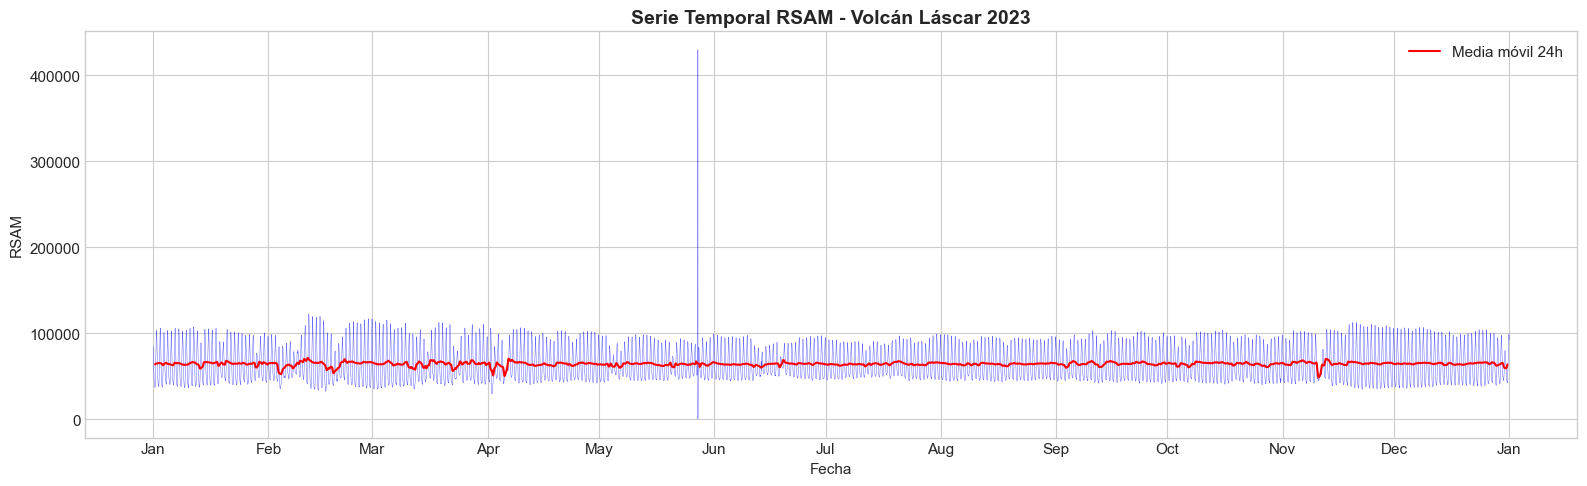

In [ ]:

fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(df_rsam['datetime'], df_rsam['rsam'], 'b-', linewidth=0.3, alpha=0.7)


rolling_24h = df_rsam['rsam'].rolling(window=24*RSAM_PER_HOUR, center=True).mean()
ax.plot(df_rsam['datetime'], rolling_24h, 'r-', linewidth=1.5, label='Media móvil 24h')

ax.set_title('Serie Temporal RSAM - Volcán Láscar 2023', fontweight='bold', fontsize=14)
ax.set_xlabel('Fecha')
ax.set_ylabel('RSAM')
ax.legend(loc='upper right')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'eda_rsam_full_year.png', dpi=150, bbox_inches='tight')
plt.show()

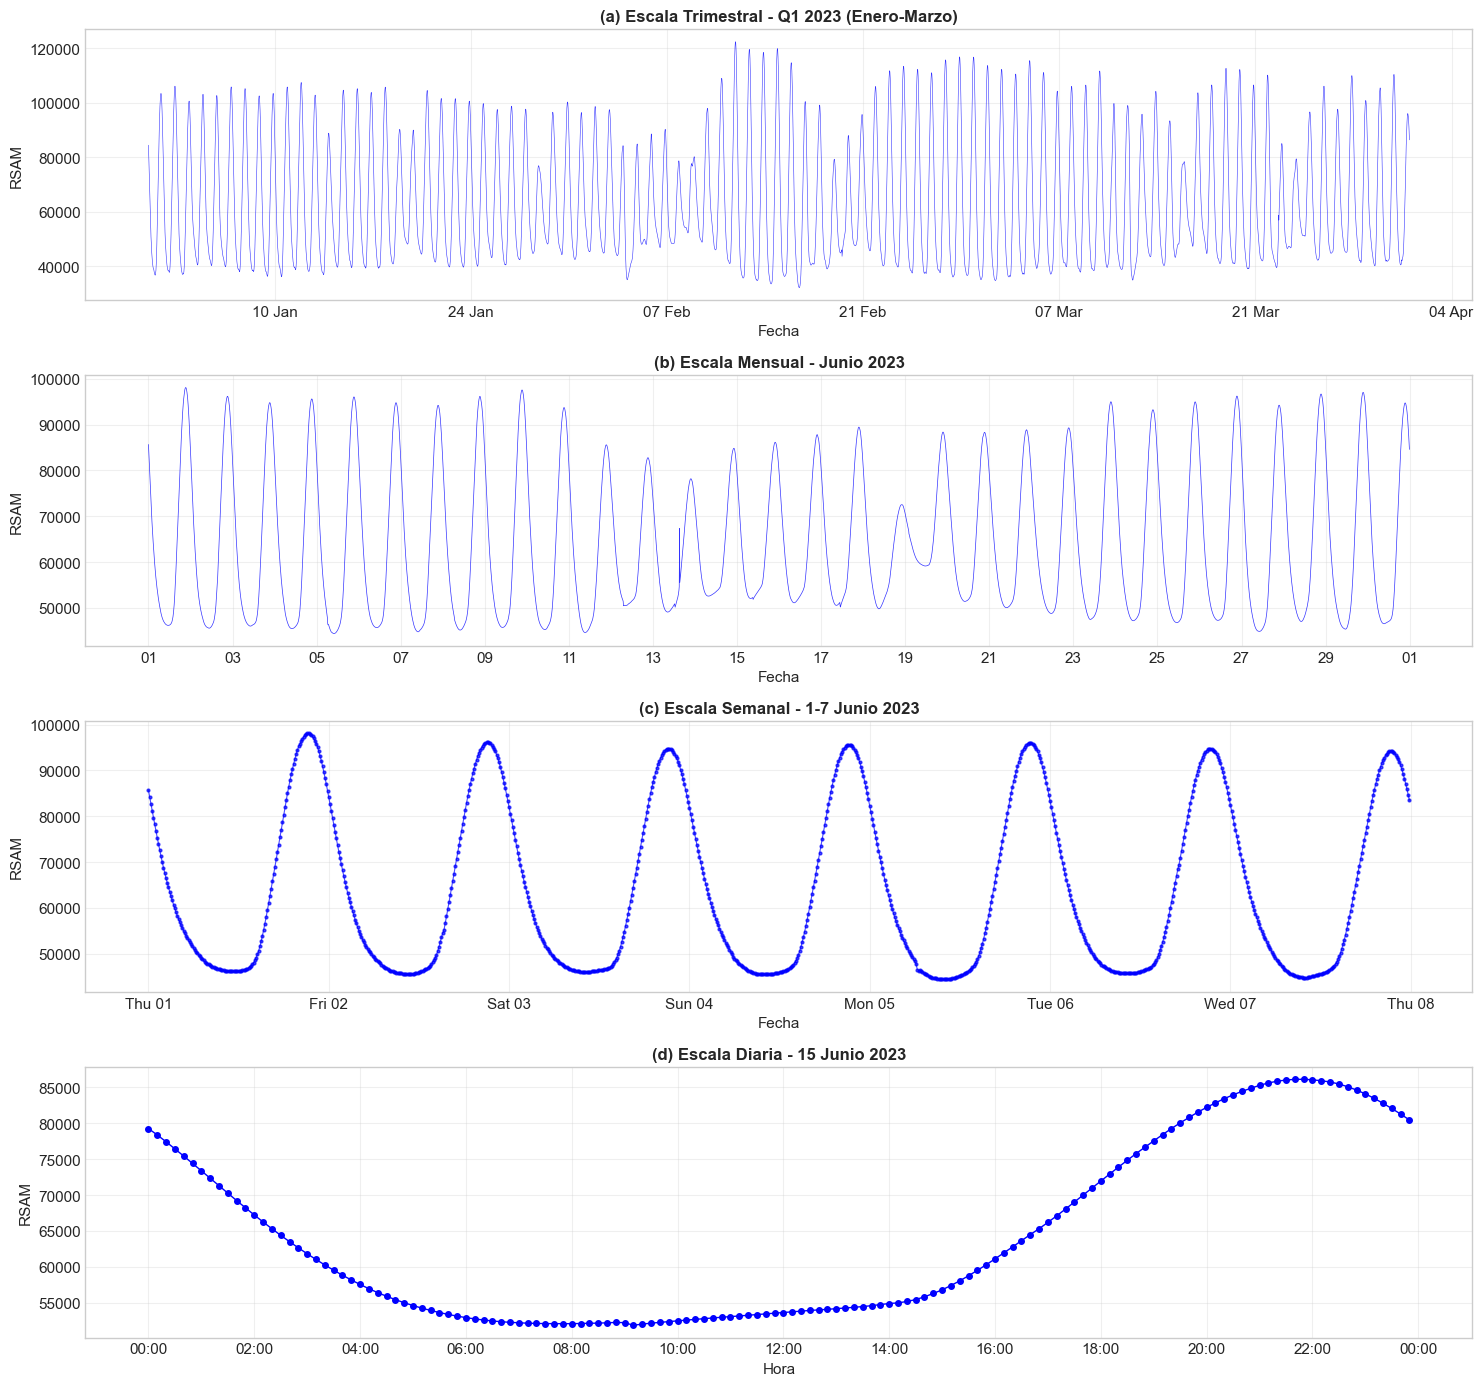

In [ ]:

fig, axes = plt.subplots(4, 1, figsize=(15, 14))


ax = axes[0]
mask_q1 = (df_rsam['datetime'].dt.month >= 1) & (df_rsam['datetime'].dt.month <= 3)
q1_data = df_rsam[mask_q1]
ax.plot(q1_data['datetime'], q1_data['rsam'], 'b-', linewidth=0.4, alpha=0.8)
ax.set_title('(a) Escala Trimestral - Q1 2023 (Enero-Marzo)', fontweight='bold')
ax.set_xlabel('Fecha')
ax.set_ylabel('RSAM')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))


ax = axes[1]
mask_month = df_rsam['datetime'].dt.month == 6
month_data = df_rsam[mask_month]
ax.plot(month_data['datetime'], month_data['rsam'], 'b-', linewidth=0.5, alpha=0.8)
ax.set_title('(b) Escala Mensual - Junio 2023', fontweight='bold')
ax.set_xlabel('Fecha')
ax.set_ylabel('RSAM')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))


ax = axes[2]
start_week = pd.Timestamp('2023-06-01')
end_week = start_week + pd.Timedelta(days=7)
mask_week = (df_rsam['datetime'] >= start_week) & (df_rsam['datetime'] < end_week)
week_data = df_rsam[mask_week]
ax.plot(week_data['datetime'], week_data['rsam'], 'b-', linewidth=0.8, marker='o', markersize=2, alpha=0.7)
ax.set_title('(c) Escala Semanal - 1-7 Junio 2023', fontweight='bold')
ax.set_xlabel('Fecha')
ax.set_ylabel('RSAM')
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %d'))


ax = axes[3]
target_day = pd.Timestamp('2023-06-15')
mask_day = df_rsam['datetime'].dt.date == target_day.date()
day_data = df_rsam[mask_day]
ax.plot(day_data['datetime'], day_data['rsam'], 'b-', linewidth=1, marker='o', markersize=4)
ax.set_title('(d) Escala Diaria - 15 Junio 2023', fontweight='bold')
ax.set_xlabel('Hora')
ax.set_ylabel('RSAM')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

for ax in axes:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'eda_rsam_multiscale.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 4. Análisis de Tendencias

In [ ]:

df_rsam['date'] = df_rsam['datetime'].dt.date
df_rsam['hour'] = df_rsam['datetime'].dt.hour
df_rsam['dayofweek'] = df_rsam['datetime'].dt.dayofweek
df_rsam['dayofyear'] = df_rsam['datetime'].dt.dayofyear


daily_stats = df_rsam.groupby('date').agg({
    'rsam': ['mean', 'std', 'min', 'max', 'median'],
    'dayofyear': 'first'
}).reset_index()
daily_stats.columns = ['date', 'mean', 'std', 'min', 'max', 'median', 'dayofyear']
daily_stats['date'] = pd.to_datetime(daily_stats['date'])

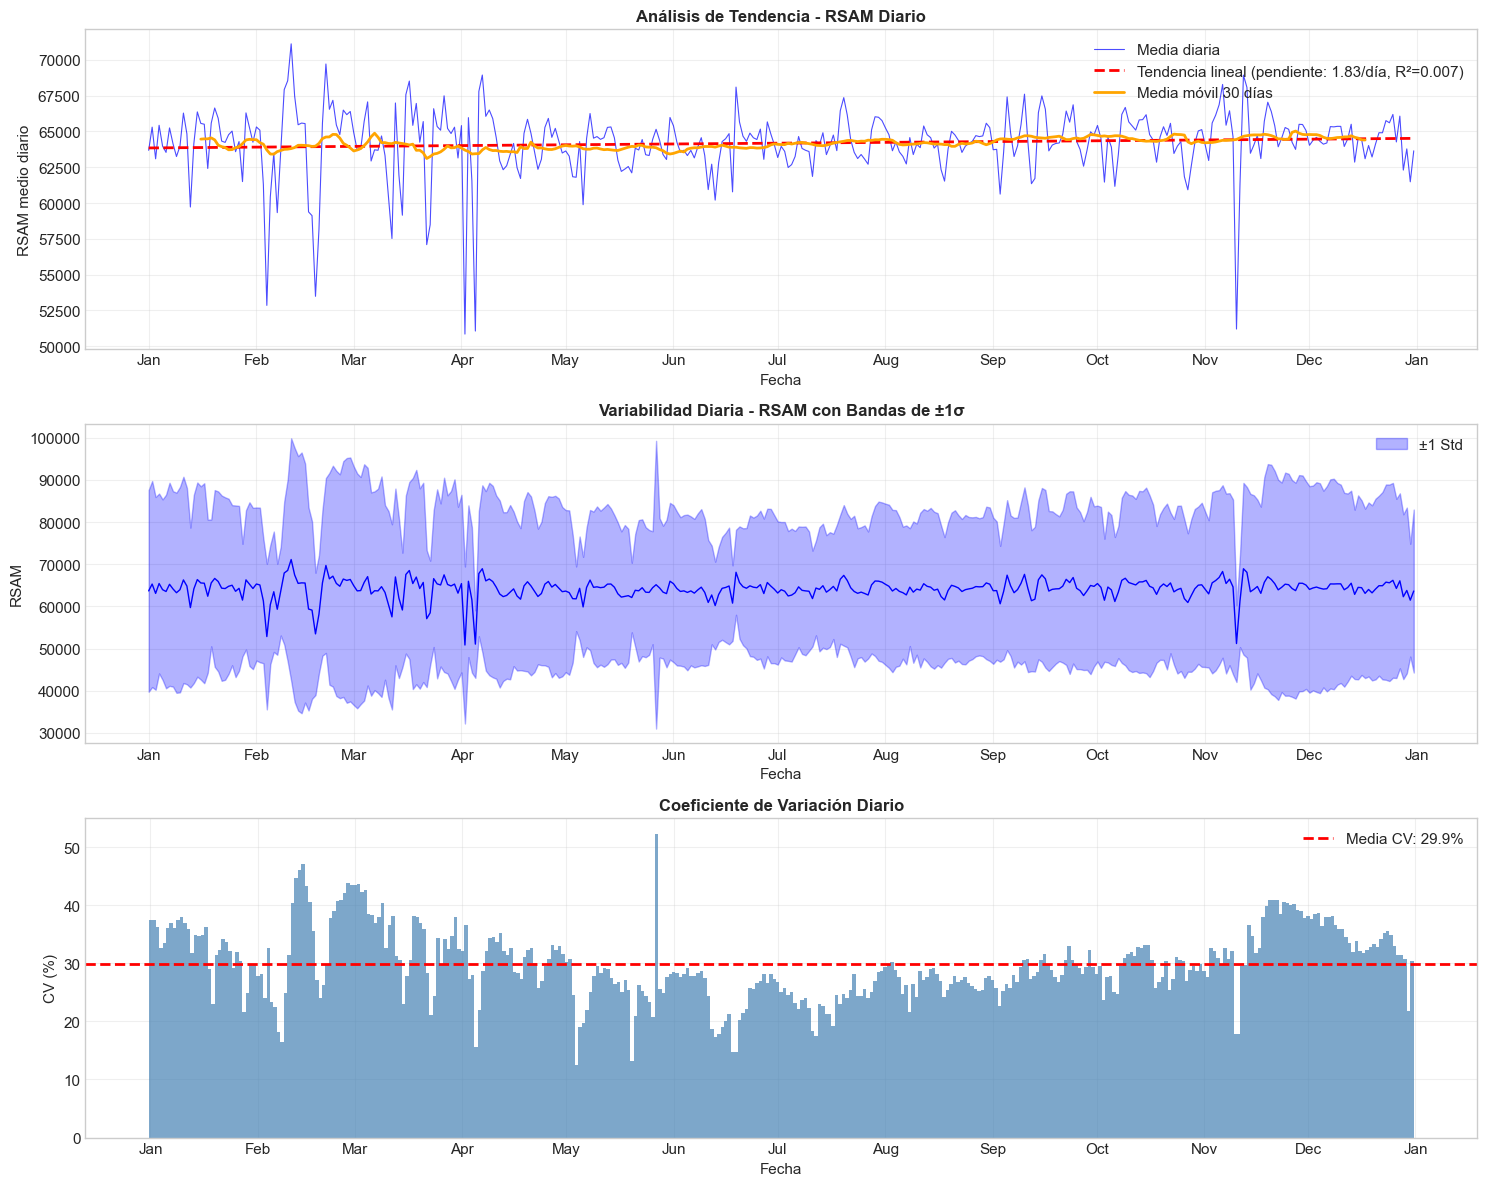


📈 Análisis de tendencia lineal:
   Pendiente: 1.8325 por día
   R²: 0.0068
   p-valor: 1.1446e-01
   → No hay tendencia significativa (serie relativamente estacionaria)


In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))


ax = axes[0]
ax.plot(daily_stats['date'], daily_stats['mean'], 'b-', linewidth=0.8, alpha=0.7, label='Media diaria')


x_numeric = np.arange(len(daily_stats))
slope, intercept, r_value, p_value, std_err = stats.linregress(x_numeric, daily_stats['mean'])
trend_line = slope * x_numeric + intercept
ax.plot(daily_stats['date'], trend_line, 'r--', linewidth=2, 
        label=f'Tendencia lineal (pendiente: {slope:.2f}/día, R²={r_value**2:.3f})')


rolling_30d = daily_stats['mean'].rolling(window=30, center=True).mean()
ax.plot(daily_stats['date'], rolling_30d, 'orange', linewidth=2, label='Media móvil 30 días')

ax.set_title('Análisis de Tendencia - RSAM Diario', fontweight='bold')
ax.set_xlabel('Fecha')
ax.set_ylabel('RSAM medio diario')
ax.legend(loc='upper right')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


ax = axes[1]
ax.fill_between(daily_stats['date'], 
                daily_stats['mean'] - daily_stats['std'],
                daily_stats['mean'] + daily_stats['std'],
                alpha=0.3, color='blue', label='±1 Std')
ax.plot(daily_stats['date'], daily_stats['mean'], 'b-', linewidth=1)
ax.set_title('Variabilidad Diaria - RSAM con Bandas de ±1σ', fontweight='bold')
ax.set_xlabel('Fecha')
ax.set_ylabel('RSAM')
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


ax = axes[2]
cv_daily = (daily_stats['std'] / daily_stats['mean']) * 100
ax.bar(daily_stats['date'], cv_daily, width=1, color='steelblue', alpha=0.7)
ax.axhline(cv_daily.mean(), color='red', linestyle='--', linewidth=2, label=f'Media CV: {cv_daily.mean():.1f}%')
ax.set_title('Coeficiente de Variación Diario', fontweight='bold')
ax.set_xlabel('Fecha')
ax.set_ylabel('CV (%)')
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

for ax in axes:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'eda_rsam_trends.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n📈 Análisis de tendencia lineal:")
print(f"   Pendiente: {slope:.4f} por día")
print(f"   R²: {r_value**2:.4f}")
print(f"   p-valor: {p_value:.4e}")
if p_value < 0.05:
    print(f"   → Tendencia estadísticamente significativa")
else:
    print(f"   → No hay tendencia significativa (serie relativamente estacionaria)")

---
## 5. Análisis de Estacionalidad

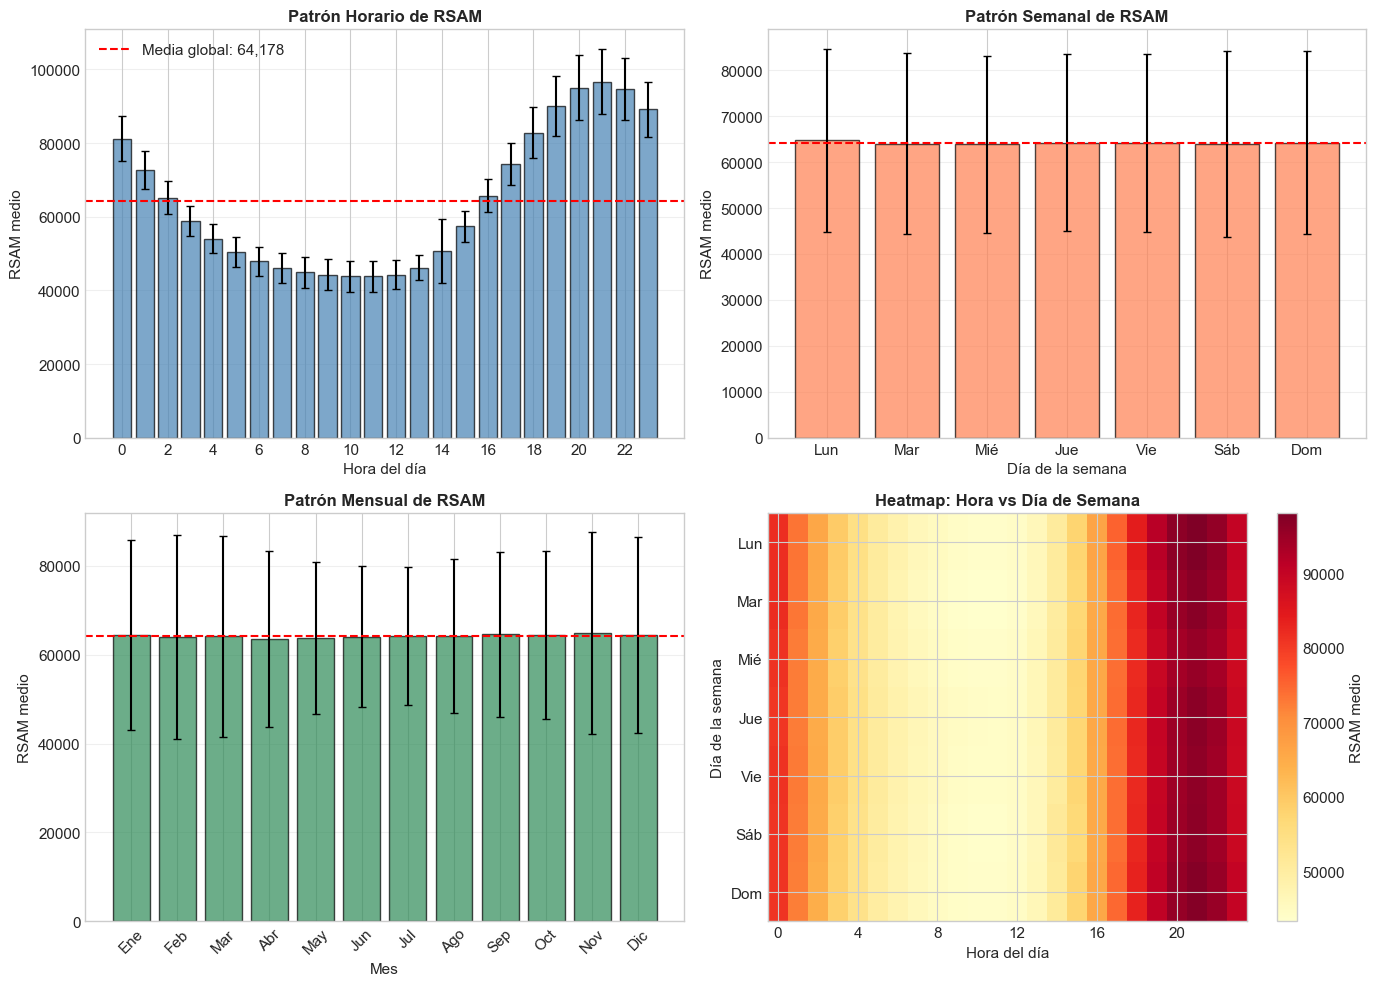


🔄 Análisis de estacionalidad:
   CV horario:  29.99% (fuerte)
   CV semanal:  0.44% (débil)
   CV mensual:  0.52% (débil)


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))


ax = axes[0, 0]
hourly_pattern = df_rsam.groupby('hour')['rsam'].agg(['mean', 'std']).reset_index()
ax.bar(hourly_pattern['hour'], hourly_pattern['mean'], yerr=hourly_pattern['std'], 
       capsize=3, color='steelblue', alpha=0.7, edgecolor='black')
ax.axhline(df_rsam['rsam'].mean(), color='red', linestyle='--', label=f'Media global: {df_rsam["rsam"].mean():,.0f}')
ax.set_title('Patrón Horario de RSAM', fontweight='bold')
ax.set_xlabel('Hora del día')
ax.set_ylabel('RSAM medio')
ax.set_xticks(range(0, 24, 2))
ax.legend()


ax = axes[0, 1]
weekly_pattern = df_rsam.groupby('dayofweek')['rsam'].agg(['mean', 'std']).reset_index()
days_names = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
ax.bar(range(7), weekly_pattern['mean'], yerr=weekly_pattern['std'],
       capsize=3, color='coral', alpha=0.7, edgecolor='black')
ax.axhline(df_rsam['rsam'].mean(), color='red', linestyle='--')
ax.set_title('Patrón Semanal de RSAM', fontweight='bold')
ax.set_xlabel('Día de la semana')
ax.set_ylabel('RSAM medio')
ax.set_xticks(range(7))
ax.set_xticklabels(days_names)


ax = axes[1, 0]
monthly_pattern = df_rsam.groupby('month')['rsam'].agg(['mean', 'std']).reset_index()
months_names = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
ax.bar(range(1, 13), monthly_pattern['mean'], yerr=monthly_pattern['std'],
       capsize=3, color='seagreen', alpha=0.7, edgecolor='black')
ax.axhline(df_rsam['rsam'].mean(), color='red', linestyle='--')
ax.set_title('Patrón Mensual de RSAM', fontweight='bold')
ax.set_xlabel('Mes')
ax.set_ylabel('RSAM medio')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months_names, rotation=45)


ax = axes[1, 1]
pivot_table = df_rsam.pivot_table(values='rsam', index='dayofweek', columns='hour', aggfunc='mean')
im = ax.imshow(pivot_table.values, aspect='auto', cmap='YlOrRd')
ax.set_title('Heatmap: Hora vs Día de Semana', fontweight='bold')
ax.set_xlabel('Hora del día')
ax.set_ylabel('Día de la semana')
ax.set_xticks(range(0, 24, 4))
ax.set_yticks(range(7))
ax.set_yticklabels(days_names)
plt.colorbar(im, ax=ax, label='RSAM medio')

for ax in axes.flat[:3]:
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'eda_rsam_seasonality.png', dpi=150, bbox_inches='tight')
plt.show()


hourly_cv = (hourly_pattern['mean'].std() / hourly_pattern['mean'].mean()) * 100
weekly_cv = (weekly_pattern['mean'].std() / weekly_pattern['mean'].mean()) * 100
monthly_cv = (monthly_pattern['mean'].std() / monthly_pattern['mean'].mean()) * 100

print(f"\n🔄 Análisis de estacionalidad:")
print(f"   CV horario:  {hourly_cv:.2f}% {'(débil)' if hourly_cv < 5 else '(moderada)' if hourly_cv < 15 else '(fuerte)'}")
print(f"   CV semanal:  {weekly_cv:.2f}% {'(débil)' if weekly_cv < 5 else '(moderada)' if weekly_cv < 15 else '(fuerte)'}")
print(f"   CV mensual:  {monthly_cv:.2f}% {'(débil)' if monthly_cv < 5 else '(moderada)' if monthly_cv < 15 else '(fuerte)'}")

---
## 6. Análisis de Autocorrelación

Fundamental para determinar la estructura temporal de la serie y seleccionar horizontes de predicción.

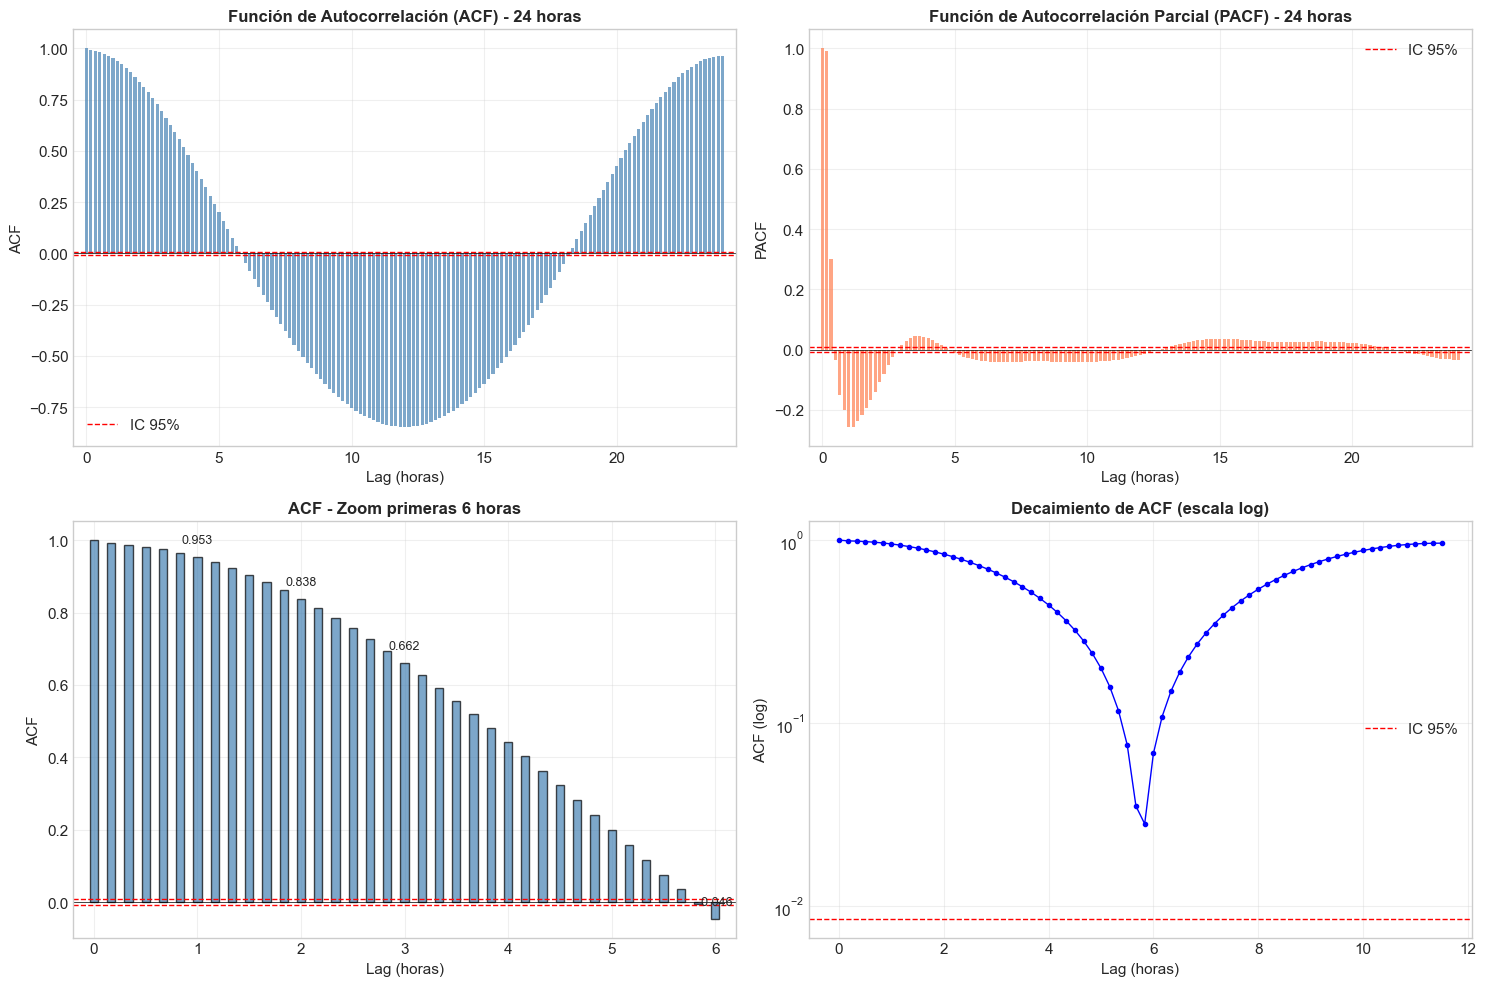


📊 Análisis de Autocorrelación:
   ACF(1 hora):   0.9527
   ACF(6 horas):  -0.0456
   ACF(12 horas): -0.8464
   ACF(24 horas): 0.9625

   Último lag significativo: 24.0 horas

   → La serie tiene FUERTE autocorrelación
   → Ideal para predicción temporal con horizontes de 6-24 horas


In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


n_lags = 24 * RSAM_PER_HOUR  
acf_values = acf(df_rsam['rsam'].values, nlags=n_lags, fft=True)
pacf_values = pacf(df_rsam['rsam'].values, nlags=min(n_lags, len(df_rsam)//2 - 1), method='ywm')


conf_int = 1.96 / np.sqrt(len(df_rsam))

fig, axes = plt.subplots(2, 2, figsize=(15, 10))


ax = axes[0, 0]
lags_hours = np.arange(len(acf_values)) / RSAM_PER_HOUR
ax.bar(lags_hours, acf_values, width=0.12, alpha=0.7, color='steelblue', edgecolor='none')
ax.axhline(y=conf_int, color='red', linestyle='--', linewidth=1, label='IC 95%')
ax.axhline(y=-conf_int, color='red', linestyle='--', linewidth=1)
ax.axhline(y=0, color='black', linewidth=0.5)
ax.set_title('Función de Autocorrelación (ACF) - 24 horas', fontweight='bold')
ax.set_xlabel('Lag (horas)')
ax.set_ylabel('ACF')
ax.set_xlim(-0.5, 24.5)
ax.legend()


ax = axes[0, 1]
lags_hours_pacf = np.arange(len(pacf_values)) / RSAM_PER_HOUR
ax.bar(lags_hours_pacf, pacf_values, width=0.12, alpha=0.7, color='coral', edgecolor='none')
ax.axhline(y=conf_int, color='red', linestyle='--', linewidth=1, label='IC 95%')
ax.axhline(y=-conf_int, color='red', linestyle='--', linewidth=1)
ax.axhline(y=0, color='black', linewidth=0.5)
ax.set_title('Función de Autocorrelación Parcial (PACF) - 24 horas', fontweight='bold')
ax.set_xlabel('Lag (horas)')
ax.set_ylabel('PACF')
ax.set_xlim(-0.5, 24.5)
ax.legend()


ax = axes[1, 0]
zoom_lags = 6 * RSAM_PER_HOUR + 1
lags_hours_zoom = np.arange(zoom_lags) / RSAM_PER_HOUR
ax.bar(lags_hours_zoom, acf_values[:zoom_lags], width=0.08, alpha=0.7, color='steelblue', edgecolor='black')
ax.axhline(y=conf_int, color='red', linestyle='--', linewidth=1)
ax.axhline(y=-conf_int, color='red', linestyle='--', linewidth=1)
ax.axhline(y=0, color='black', linewidth=0.5)
ax.set_title('ACF - Zoom primeras 6 horas', fontweight='bold')
ax.set_xlabel('Lag (horas)')
ax.set_ylabel('ACF')
ax.set_xlim(-0.2, 6.2)


for i in [1, 2, 3, 6]:
    idx = i * RSAM_PER_HOUR
    if idx < len(acf_values):
        ax.annotate(f'{acf_values[idx]:.3f}', (i, acf_values[idx]), 
                   textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)


ax = axes[1, 1]
positive_acf = acf_values[acf_values > 0]
lags_positive = np.arange(len(positive_acf)) / RSAM_PER_HOUR
ax.semilogy(lags_positive, positive_acf, 'b-o', markersize=3, linewidth=1)
ax.set_title('Decaimiento de ACF (escala log)', fontweight='bold')
ax.set_xlabel('Lag (horas)')
ax.set_ylabel('ACF (log)')
ax.axhline(y=conf_int, color='red', linestyle='--', linewidth=1, label='IC 95%')
ax.legend()

for ax in axes.flat:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'eda_rsam_autocorrelation.png', dpi=150, bbox_inches='tight')
plt.show()


significant_lags = np.where(acf_values[1:] > conf_int)[0]
if len(significant_lags) > 0:
    last_significant = significant_lags[-1] + 1
else:
    last_significant = 0

print(f"\n📊 Análisis de Autocorrelación:")
print(f"   ACF(1 hora):   {acf_values[RSAM_PER_HOUR]:.4f}")
print(f"   ACF(6 horas):  {acf_values[6*RSAM_PER_HOUR]:.4f}")
print(f"   ACF(12 horas): {acf_values[12*RSAM_PER_HOUR]:.4f}")
print(f"   ACF(24 horas): {acf_values[24*RSAM_PER_HOUR]:.4f}")
print(f"\n   Último lag significativo: {last_significant/RSAM_PER_HOUR:.1f} horas")
print(f"\n   → La serie tiene FUERTE autocorrelación")
print(f"   → Ideal para predicción temporal con horizontes de 6-24 horas")

---
## 7. Test de Estacionariedad (ADF)

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(series, name="Serie"):
    """Test Augmented Dickey-Fuller para estacionariedad."""
    result = adfuller(series, autolag='AIC')
    
    print(f"\n{'='*60}")
    print(f"TEST ADF - {name}")
    print(f"{'='*60}")
    print(f"   Estadístico ADF:  {result[0]:.4f}")
    print(f"   p-valor:          {result[1]:.6f}")
    print(f"   Lags usados:      {result[2]}")
    print(f"   Observaciones:    {result[3]}")
    print(f"\n   Valores críticos:")
    for key, value in result[4].items():
        print(f"      {key}: {value:.4f}")
    
    is_stationary = result[1] < 0.05
    print(f"\n   Conclusión: {'✓ ESTACIONARIA' if is_stationary else '✗ NO ESTACIONARIA'} (α=0.05)")
    
    return {'statistic': result[0], 'p_value': result[1], 'is_stationary': is_stationary}


adf_original = adf_test(df_rsam['rsam'].values, "RSAM Original")


rsam_diff = np.diff(df_rsam['rsam'].values)
adf_diff = adf_test(rsam_diff, "RSAM Diferenciada (d=1)")


TEST ADF - RSAM Original
   Estadístico ADF:  -59.6775
   p-valor:          0.000000
   Lags usados:      58
   Observaciones:    52501

   Valores críticos:
      1%: -3.4305
      5%: -2.8616
      10%: -2.5668

   Conclusión: ✓ ESTACIONARIA (α=0.05)

TEST ADF - RSAM Diferenciada (d=1)
   Estadístico ADF:  -39.6419
   p-valor:          0.000000
   Lags usados:      58
   Observaciones:    52500

   Valores críticos:
      1%: -3.4305
      5%: -2.8616
      10%: -2.5668

   Conclusión: ✓ ESTACIONARIA (α=0.05)


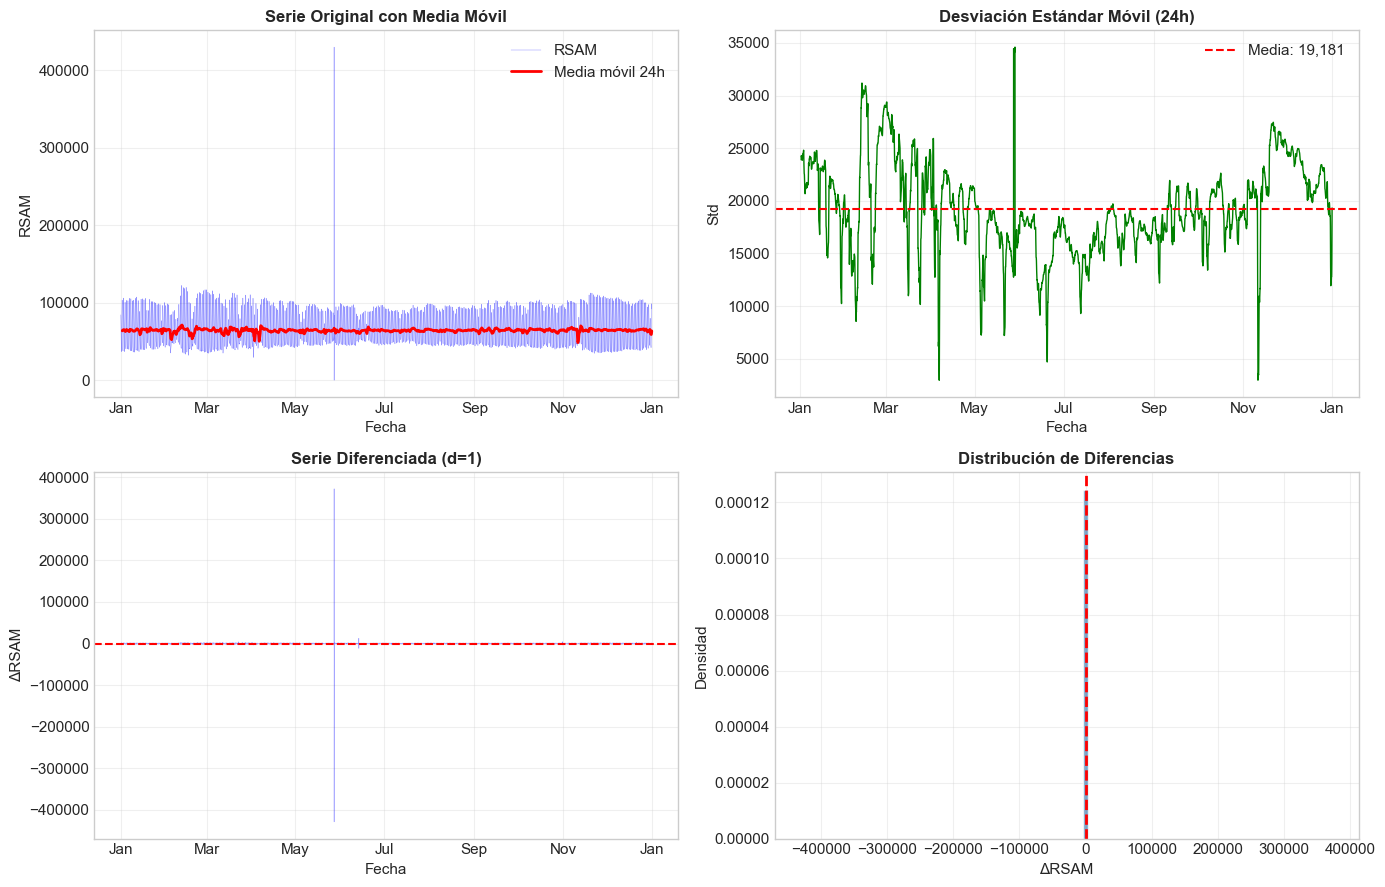

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(14, 9))


ax = axes[0, 0]
ax.plot(df_rsam['datetime'], df_rsam['rsam'], 'b-', linewidth=0.3, alpha=0.5, label='RSAM')
rolling_mean = df_rsam['rsam'].rolling(window=24*RSAM_PER_HOUR).mean()
rolling_std = df_rsam['rsam'].rolling(window=24*RSAM_PER_HOUR).std()
ax.plot(df_rsam['datetime'], rolling_mean, 'r-', linewidth=2, label='Media móvil 24h')
ax.set_title('Serie Original con Media Móvil', fontweight='bold')
ax.set_xlabel('Fecha')
ax.set_ylabel('RSAM')
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


ax = axes[0, 1]
ax.plot(df_rsam['datetime'], rolling_std, 'g-', linewidth=1)
ax.axhline(rolling_std.mean(), color='red', linestyle='--', label=f'Media: {rolling_std.mean():,.0f}')
ax.set_title('Desviación Estándar Móvil (24h)', fontweight='bold')
ax.set_xlabel('Fecha')
ax.set_ylabel('Std')
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


ax = axes[1, 0]
ax.plot(df_rsam['datetime'][1:], rsam_diff, 'b-', linewidth=0.3, alpha=0.5)
ax.axhline(0, color='red', linestyle='--')
ax.set_title('Serie Diferenciada (d=1)', fontweight='bold')
ax.set_xlabel('Fecha')
ax.set_ylabel('ΔRSAM')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


ax = axes[1, 1]
ax.hist(rsam_diff, bins=100, density=True, alpha=0.7, color='steelblue', edgecolor='white')
ax.axvline(0, color='red', linestyle='--', linewidth=2)
ax.set_title('Distribución de Diferencias', fontweight='bold')
ax.set_xlabel('ΔRSAM')
ax.set_ylabel('Densidad')

for ax in axes.flat:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'eda_rsam_stationarity.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 8. Detección de Anomalías y Cambios de Régimen

In [ ]:

Q1 = df_rsam['rsam'].quantile(0.25)
Q3 = df_rsam['rsam'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


extreme_upper = Q3 + 3 * IQR

outliers = df_rsam[(df_rsam['rsam'] < lower_bound) | (df_rsam['rsam'] > upper_bound)]
extreme_outliers = df_rsam[df_rsam['rsam'] > extreme_upper]

print(f"\n⚠️ DETECCIÓN DE ANOMALÍAS (método IQR):")
print(f"   Q1: {Q1:,.0f}")
print(f"   Q3: {Q3:,.0f}")
print(f"   IQR: {IQR:,.0f}")
print(f"   Límite inferior: {lower_bound:,.0f}")
print(f"   Límite superior: {upper_bound:,.0f}")
print(f"\n   Outliers totales: {len(outliers):,} ({len(outliers)/len(df_rsam)*100:.2f}%)")
print(f"   Outliers extremos (>3*IQR): {len(extreme_outliers):,}")


⚠️ DETECCIÓN DE ANOMALÍAS (método IQR):
   Q1: 47,288
   Q3: 80,756
   IQR: 33,467
   Límite inferior: -2,912
   Límite superior: 130,956

   Outliers totales: 1 (0.00%)
   Outliers extremos (>3*IQR): 1


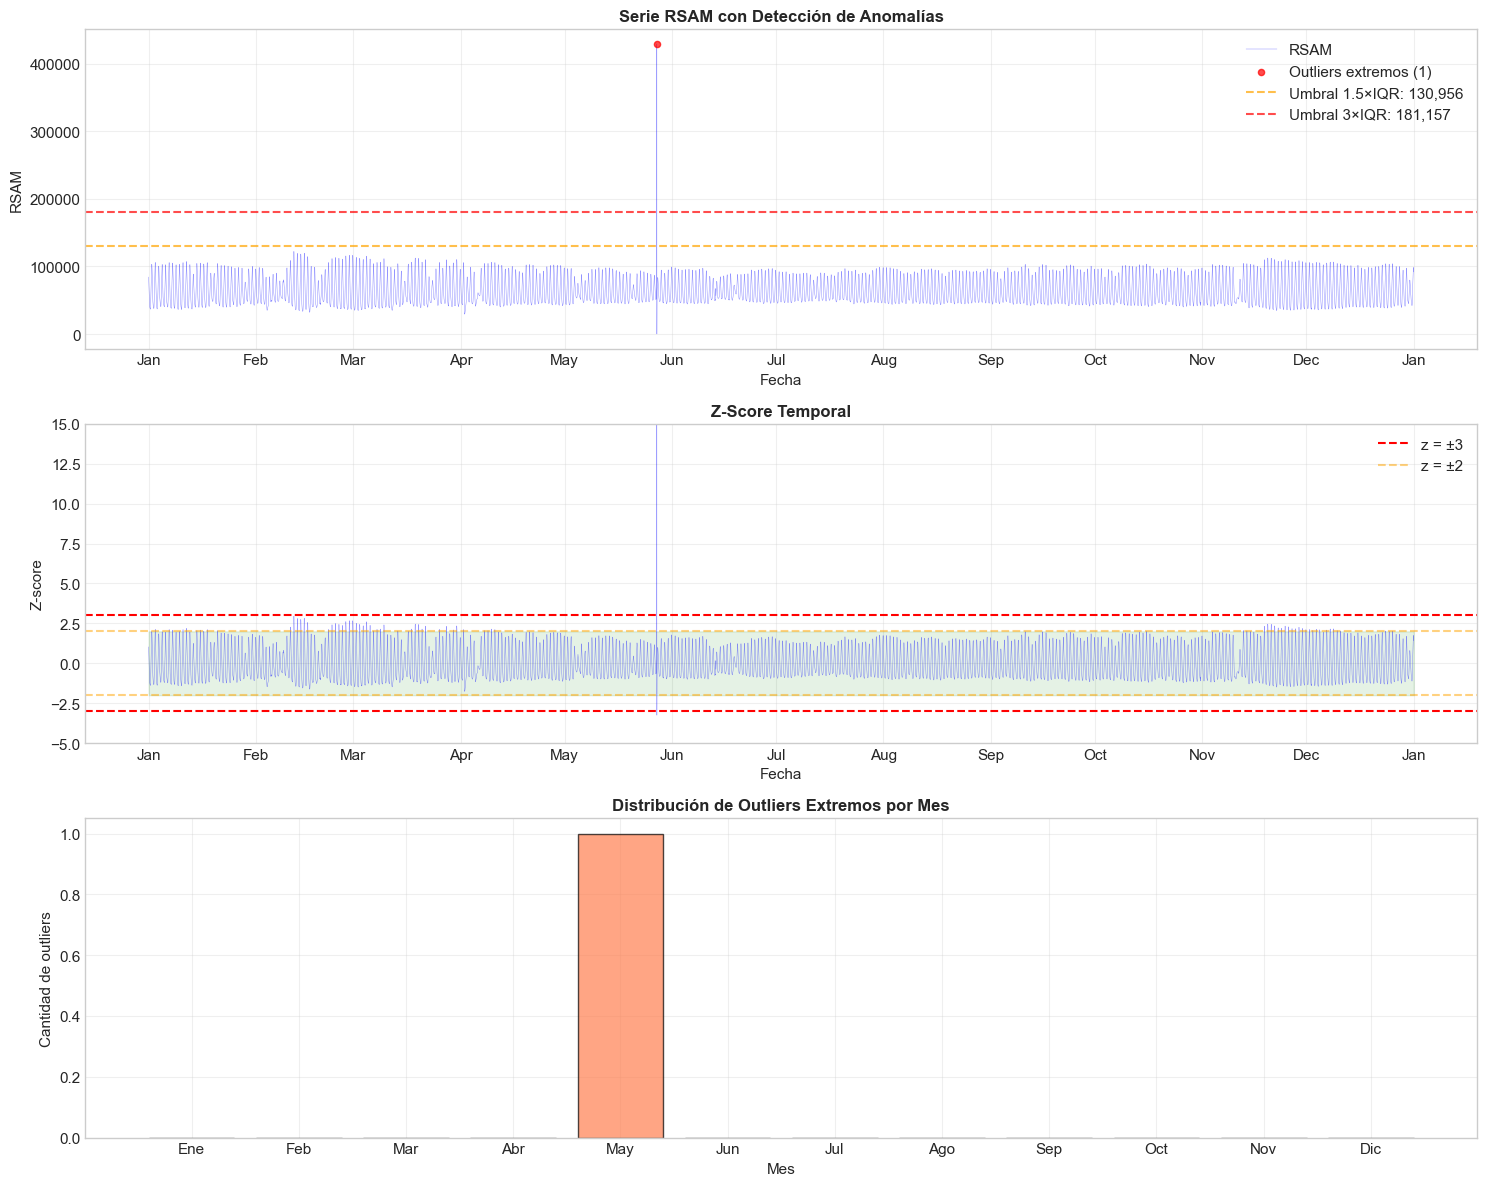


🔝 Top 10 valores RSAM más altos:
   1. 2023-05-27 14:40:00 - RSAM: 429,773
   2. 2023-02-11 21:30:00 - RSAM: 122,325
   3. 2023-02-11 21:20:00 - RSAM: 122,262
   4. 2023-02-11 21:40:00 - RSAM: 122,258
   5. 2023-02-11 21:10:00 - RSAM: 122,047
   6. 2023-02-11 21:50:00 - RSAM: 122,044
   7. 2023-02-11 21:00:00 - RSAM: 121,691
   8. 2023-02-11 22:00:00 - RSAM: 121,641
   9. 2023-02-11 20:50:00 - RSAM: 121,120
   10. 2023-02-11 22:10:00 - RSAM: 121,077


In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))


ax = axes[0]
ax.plot(df_rsam['datetime'], df_rsam['rsam'], 'b-', linewidth=0.3, alpha=0.5, label='RSAM')
ax.scatter(extreme_outliers['datetime'], extreme_outliers['rsam'], 
           c='red', s=20, alpha=0.7, label=f'Outliers extremos ({len(extreme_outliers)})', zorder=5)
ax.axhline(upper_bound, color='orange', linestyle='--', alpha=0.7, label=f'Umbral 1.5×IQR: {upper_bound:,.0f}')
ax.axhline(extreme_upper, color='red', linestyle='--', alpha=0.7, label=f'Umbral 3×IQR: {extreme_upper:,.0f}')
ax.set_title('Serie RSAM con Detección de Anomalías', fontweight='bold')
ax.set_xlabel('Fecha')
ax.set_ylabel('RSAM')
ax.legend(loc='upper right')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


ax = axes[1]
z_scores = (df_rsam['rsam'] - df_rsam['rsam'].mean()) / df_rsam['rsam'].std()
ax.plot(df_rsam['datetime'], z_scores, 'b-', linewidth=0.3, alpha=0.5)
ax.axhline(3, color='red', linestyle='--', label='z = ±3')
ax.axhline(-3, color='red', linestyle='--')
ax.axhline(2, color='orange', linestyle='--', alpha=0.5, label='z = ±2')
ax.axhline(-2, color='orange', linestyle='--', alpha=0.5)
ax.fill_between(df_rsam['datetime'], -2, 2, alpha=0.1, color='green')
ax.set_title('Z-Score Temporal', fontweight='bold')
ax.set_xlabel('Fecha')
ax.set_ylabel('Z-score')
ax.set_ylim(-5, 15)
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


ax = axes[2]
outliers_by_month = extreme_outliers.groupby(extreme_outliers['datetime'].dt.month).size()
all_months = pd.Series(0, index=range(1, 13))
outliers_by_month = outliers_by_month.reindex(range(1, 13), fill_value=0)
ax.bar(range(1, 13), outliers_by_month.values, color='coral', edgecolor='black', alpha=0.7)
ax.set_title('Distribución de Outliers Extremos por Mes', fontweight='bold')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de outliers')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

for ax in axes:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'eda_rsam_anomalies.png', dpi=150, bbox_inches='tight')
plt.show()


print("\n🔝 Top 10 valores RSAM más altos:")
top10 = df_rsam.nlargest(10, 'rsam')[['datetime', 'rsam']]
for i, (_, row) in enumerate(top10.iterrows(), 1):
    print(f"   {i}. {row['datetime']} - RSAM: {row['rsam']:,.0f}")